## Peter Pan Book Emotion Detection Results
### *Threshold=0.6*

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report)

In [2]:
# pd.set_option('display.max_rows', 200)

In [3]:
def get_max_emotion_score_df(file, emotion_col, emotion_count_col):
    df = pd.read_csv(file)
    df[emotion_col] = df[['joy','sadness','anger','love','thankfulness','fear']].idxmax(axis=1)
    df[emotion_count_col] = df[emotion_col].groupby(df[emotion_col]).transform(emotion_count_col)
    return df

In [4]:
def display_bar_chart(df, emotion_col, emotion_count_col):
    emotions = df[emotion_col].unique()
    emotions_count = []
    for emotion in emotions:
        emotions_count.append(df[df[emotion_col]==emotion][:1][emotion_count_col].item())
    # for emotion, count in zip(emotions, emotions_count):
    #    print(f"{emotion}: {count}")
    data_tuples = list(zip(emotions, emotions_count))
    df = pd.DataFrame(data_tuples, columns=['emotions','count'])
    plt.figure(figsize=(10,5))
    g = sns.barplot(x='emotions', y='count', data=df.sort_values('emotions'))

## Original Dataset

In [5]:
og_df = pd.read_csv("data/peter_pan_labelled_novel_dataset.csv")
og_df["count"] = og_df["emotions"].groupby(og_df["emotions"]).transform("count")
og_df.head()

,text,emotions,count
0,on ordinary occasions the boys would have swum...,joy,24
1,"what is it? he cried, shrinking",fear,35
2,she drifted in one direction and he was borne ...,joy,24
3,"'thank you, peter.'",thankfulness,28
4,i don't want to go to school and learn solemn ...,love,26


In [6]:
og_df

,text,emotions,count
0,on ordinary occasions the boys would have swum...,joy,24
1,"what is it? he cried, shrinking",fear,35
2,she drifted in one direction and he was borne ...,joy,24
3,"'thank you, peter.'",thankfulness,28
4,i don't want to go to school and learn solemn ...,love,26
...,...,...,...
176,"Mr. Darling woke to share her bliss, and Nana ...",joy,24
177,"Then he burst into tears, and the truth came out.",sadness,43
178,I should love you in a beard; and Mrs. Darling...,love,26
179,"How lovely, cried Wendy so longingly that Mrs....",love,26


In [7]:
len(og_df)

181

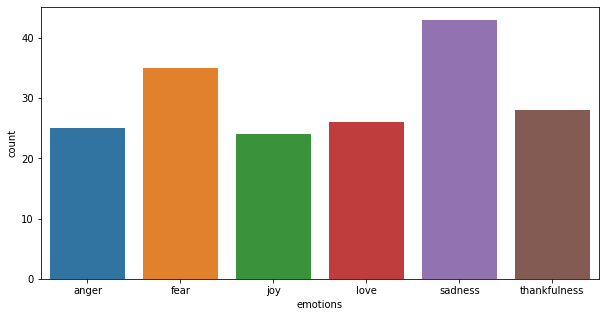

In [8]:
display_bar_chart(og_df, emotion_col="emotions", emotion_count_col="count")

## Predicted Dataset

In [9]:
pred_df = pd.read_csv("results/peter_pan_emotions_041121_171035.csv")
pred_df.head()

,text,joy,sadness,anger,love,thankfulness,fear
0,on ordinary occasions the boys would have swum...,0.740,0.924,0.091,0.353,0.374,0.228
1,"what is it? he cried, shrinking",0.297,0.226,0.943,0.835,0.778,0.100
2,she drifted in one direction and he was borne ...,0.362,0.503,0.267,0.568,0.953,0.133
3,"'thank you, peter.'",0.472,0.072,0.136,0.025,0.043,0.738
4,i don't want to go to school and learn solemn ...,0.537,0.546,0.603,0.690,0.218,0.456


In [10]:
len(pred_df)

181

# Model Threshold = 0.6

In [11]:
THRESH = 0.6

In [12]:
pred_df["joy_cat"] = (pred_df['joy'] > THRESH).astype(int)
pred_df["sadness_cat"] = (pred_df['sadness'] > THRESH).astype(int)
pred_df["anger_cat"] = (pred_df['anger'] > THRESH).astype(int)
pred_df["love_cat"] = (pred_df['love'] > THRESH).astype(int)
pred_df["thankfulness_cat"] = (pred_df['thankfulness'] > THRESH).astype(int)
pred_df["fear_cat"] = (pred_df['fear'] > THRESH).astype(int)

In [13]:
pred_df.head(2)

,text,joy,sadness,anger,love,thankfulness,fear,joy_cat,sadness_cat,anger_cat,love_cat,thankfulness_cat,fear_cat
0,on ordinary occasions the boys would have swum...,0.740,0.924,0.091,0.353,0.374,0.228,1,1,0,0,0,0
1,"what is it? he cried, shrinking",0.297,0.226,0.943,0.835,0.778,0.100,0,0,1,1,1,0


## Joining Dataframe

In [14]:
join_df = pd.merge(og_df, pred_df, on='text', how='left')

In [15]:
result_df = join_df.drop_duplicates()

In [16]:
print(f"Original Data: {len(og_df)}")
print(f"Pred Data: {len(pred_df)}")
print(f"Join Data: {len(result_df)}")

Original Data: 181
Pred Data: 181
Join Data: 181


In [17]:
pred_list = []
for index, row in join_df.iterrows():
    text = row['text']
    if row["emotions"] == "anger" and row["anger_cat"] == 1:
        pred = "anger"
    if row["emotions"] == "fear" and row["fear_cat"] == 1:
        pred = "fear"
    if row["emotions"] == "joy" and row["joy_cat"] == 1:
        pred = "joy"
    if row["emotions"] == "love" and row["love_cat"] == 1:
        pred = "love"
    if row["emotions"] == "sadness" and row["sadness_cat"] == 1:
        pred = "sadness"
    if row["emotions"] == "thankfulness" and row["thankfulness_cat"] == 1:
        pred = "thankfulness"
    else:
        if row["anger_cat"] == 1:
            pred = "anger"
        if row["fear_cat"] == 1:
            pred = "fear"
        if row["joy_cat"] == 1:
            pred = "joy"
        if row["love_cat"] == 1:
            pred = "love"
        if row["sadness_cat"] == 1:
            pred = "sadness"
        if row["thankfulness_cat"] == 1:
            pred = "thankfulness"
    pred_list.append({"text": text, "pred": pred})

In [18]:
pred_df = pd.DataFrame(pred_list)

In [19]:
len(pred_df)

181

In [20]:
pred_df

,text,pred
0,on ordinary occasions the boys would have swum...,sadness
1,"what is it? he cried, shrinking",thankfulness
2,she drifted in one direction and he was borne ...,thankfulness
3,"'thank you, peter.'",fear
4,i don't want to go to school and learn solemn ...,love
...,...,...
176,"Mr. Darling woke to share her bliss, and Nana ...",sadness
177,"Then he burst into tears, and the truth came out.",love
178,I should love you in a beard; and Mrs. Darling...,love
179,"How lovely, cried Wendy so longingly that Mrs....",joy


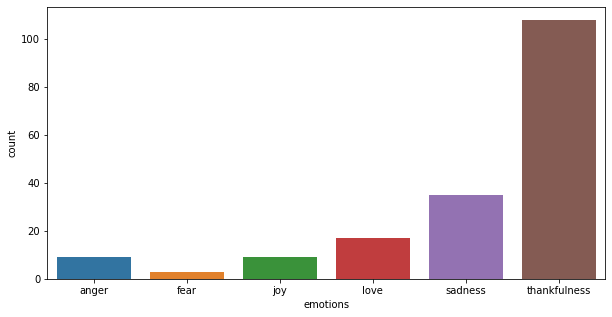

In [21]:
pred_df["count"] = pred_df["pred"].groupby(pred_df["pred"]).transform("count")
display_bar_chart(pred_df, emotion_col="pred", emotion_count_col="count")

### Categorize Emotions column (Original dataset)

In [22]:
og_df.dtypes

text        object
emotions    object
count        int64
dtype: object

In [23]:
og_df["emotions"] = og_df["emotions"].astype('category')

In [24]:
category_dict = dict(sorted(zip(og_df.emotions.cat.codes, og_df.emotions)))

In [25]:
for k, v in category_dict.items(): print(k, v)

0 anger
1 fear
2 joy
3 love
4 sadness
5 thankfulness


In [26]:
og_df.dtypes

text          object
emotions    category
count          int64
dtype: object

In [27]:
og_df["emotions_cat"] = og_df["emotions"].cat.codes
og_df.head()

,text,emotions,count,emotions_cat
0,on ordinary occasions the boys would have swum...,joy,24,2
1,"what is it? he cried, shrinking",fear,35,1
2,she drifted in one direction and he was borne ...,joy,24,2
3,"'thank you, peter.'",thankfulness,28,5
4,i don't want to go to school and learn solemn ...,love,26,3


### Categorize Emotions column (Predicted dataset)

In [28]:
pred_df.dtypes

text     object
pred     object
count     int64
dtype: object

In [29]:
pred_df["pred"] = pred_df["pred"].astype('category')

In [30]:
category_dict = dict(sorted(zip(pred_df.pred.cat.codes, pred_df.pred)))

In [31]:
for k, v in category_dict.items(): print(k, v)

0 anger
1 fear
2 joy
3 love
4 sadness
5 thankfulness


In [32]:
pred_df.dtypes

text       object
pred     category
count       int64
dtype: object

In [33]:
pred_df["pred_cat"] = pred_df["pred"].cat.codes

In [34]:
og_df.head()

,text,emotions,count,emotions_cat
0,on ordinary occasions the boys would have swum...,joy,24,2
1,"what is it? he cried, shrinking",fear,35,1
2,she drifted in one direction and he was borne ...,joy,24,2
3,"'thank you, peter.'",thankfulness,28,5
4,i don't want to go to school and learn solemn ...,love,26,3


In [35]:
pred_df.head()

,text,pred,count,pred_cat
0,on ordinary occasions the boys would have swum...,sadness,35,4
1,"what is it? he cried, shrinking",thankfulness,108,5
2,she drifted in one direction and he was borne ...,thankfulness,108,5
3,"'thank you, peter.'",fear,3,1
4,i don't want to go to school and learn solemn ...,love,17,3


## Confusion Matrix

In [36]:
confusion = confusion_matrix(og_df["emotions_cat"], pred_df["pred_cat"])

In [37]:
confusion

array([[ 2,  0,  3,  2,  4, 14],
       [ 3,  1,  1,  1,  4, 25],
       [ 1,  0,  2,  2,  5, 14],
       [ 0,  0,  1,  7,  3, 15],
       [ 2,  1,  2,  4, 16, 18],
       [ 1,  1,  0,  1,  3, 22]], dtype=int64)

In [38]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    """
    Source: https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(
        accuracy, misclass))
    plt.show()

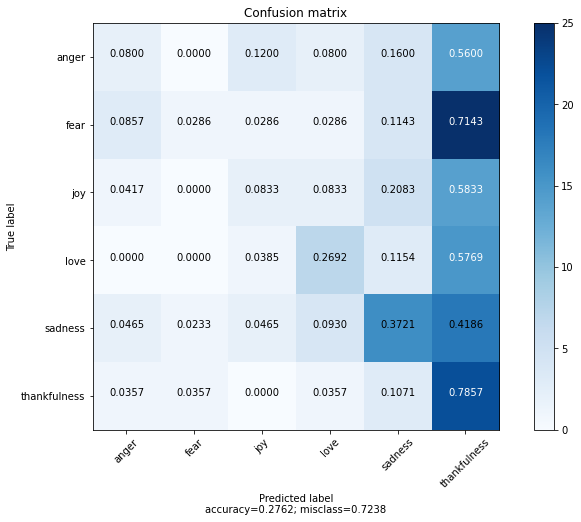

In [39]:
target_names = []
for k, v in category_dict.items(): target_names.append(v)
plot_confusion_matrix(cm=confusion, target_names=target_names, title='Confusion matrix')

In [40]:
# plt.figure(figsize=(10,6))
# sns.heatmap(confusion, annot=True, linewidths=.3)
# plt.show()

### Precision-Recall Report
<div>
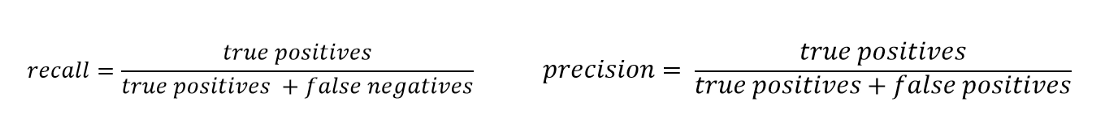
</div>

In [41]:
classes = []
for k, v in category_dict.items(): classes.append(v)
classes

['anger', 'fear', 'joy', 'love', 'sadness', 'thankfulness']

In [42]:
print(classification_report(og_df["emotions_cat"], pred_df["pred_cat"], target_names=classes))

              precision    recall  f1-score   support

       anger       0.22      0.08      0.12        25
        fear       0.33      0.03      0.05        35
         joy       0.22      0.08      0.12        24
        love       0.41      0.27      0.33        26
     sadness       0.46      0.37      0.41        43
thankfulness       0.20      0.79      0.32        28

    accuracy                           0.28       181
   macro avg       0.31      0.27      0.23       181
weighted avg       0.32      0.28      0.24       181



## Exporting Results

In [43]:
pd.options.display.max_colwidth = 250

In [44]:
# pred_df[["text","pred"]].to_csv("results/peter_pan_emotions_predictions.csv", index=False)

In [45]:
# og_df.head(2)
# pred_df.head(2)

In [46]:
final_df = pd.merge(og_df, pred_df, on='text', how='left')

In [47]:
final_df.head()

,text,emotions,count_x,emotions_cat,pred,count_y,pred_cat
0,on ordinary occasions the boys would have swum alongside cheering.,joy,24,2,sadness,35,4
1,"what is it? he cried, shrinking",fear,35,1,thankfulness,108,5
2,she drifted in one direction and he was borne off in another both cheering.,joy,24,2,thankfulness,108,5
3,"'thank you, peter.'",thankfulness,28,5,fear,3,1
4,"i don't want to go to school and learn solemn things, he told her passionately",love,26,3,love,17,3


In [48]:
anger = final_df[(final_df["emotions"]=="anger") & (final_df["pred"]=="anger")]
anger = anger[["text", "emotions", "pred"]]
anger

,text,emotions,pred
29,the never bird became irritated; they have very short tempers.,anger,anger
58,"my child, the mother cried, why did you not tell me of this before?",anger,anger


In [49]:
fear = final_df[(final_df["emotions"]=="fear") & (final_df["pred"]=="fear")]
fear = fear[["text", "emotions", "pred"]]
fear

,text,emotions,pred
13,"'me tiger lily,' that lovely creature would reply.",fear,fear


In [50]:
joy = final_df[(final_df["emotions"]=="joy") & (final_df["pred"]=="joy")]
joy = joy[["text", "emotions", "pred"]]
joy

,text,emotions,pred
88,i am going to give you your medicine before you go,joy,joy
101,then he had leapt into her arms.,joy,joy


In [51]:
love = final_df[(final_df["emotions"]=="love") & (final_df["pred"]=="love")]
love = love[["text", "emotions", "pred"]]
love

,text,emotions,pred
4,"i don't want to go to school and learn solemn things, he told her passionately",love,love
7,not round my neck! round the bed-post!,love,love
33,"'if the redskins have won,' he said, 'they will beat the tom-tom; it is always their sign of victory.'",love,love
90,still it is best to be careful; and no one knows so quickly as a child when he should give in.,love,love
93,i should love you in a beard,love,love
107,"i know where it is, father, wendy cried, always glad to be of service.",love,love
178,"I should love you in a beard; and Mrs. Darling stretched out her arms to him, but he repulsed her.",love,love


In [52]:
sadness = final_df[(final_df["emotions"]=="sadness") & (final_df["pred"]=="sadness")]
sadness = sadness[["text", "emotions", "pred"]]
sadness

,text,emotions,pred
9,next moment he was standing erect on the rock again with that smile on his face and a drum beating within him.,sadness,sadness
10,wendy would have cried if michael had not been crying.,sadness,sadness
19,he stood motionless one hand to his ear.,sadness,sadness
30,mr. darling used to boast to wendy that her mother not only loved him but respected him.,sadness,sadness
52,'do you mean we shall both be drowned?',sadness,sadness
53,smee reflected. i can't think of a thing he said regretfully.,sadness,sadness
73,"'at once,' wendy replied resolutely, for the horrible thought had come to her: 'perhaps mother is in half mourning by this time.'",sadness,sadness
102,to all mrs. darling's dear invitations to him to come out he replied sadly but firmly,sadness,sadness
116,"starkey looked round for help, but all deserted him",sadness,sadness
120,me no let pirates hurt him.,sadness,sadness


In [53]:
thankfulness = final_df[(final_df["emotions"]=="thankfulness") & (final_df["pred"]=="thankfulness")]
thankfulness = thankfulness[["text", "emotions", "pred"]]
thankfulness

,text,emotions,pred
8,not the pain of this but its unfairness was what dazed peter.,thankfulness,thankfulness
11,then at last he understood and clutched the nest and waved his thanks to the bird as she fluttered overhead.,thankfulness,thankfulness
20,luff you lubber cried an irish voice that was smee's.,thankfulness,thankfulness
22,"i forget whether they found it, but at any rate they found corners, and they all fitted in",thankfulness,thankfulness
34,he often said stocks were up and shares were down in a way that would have made any woman respect him.,thankfulness,thankfulness
40,i suppose she must have looked rather delightful,thankfulness,thankfulness
43,there was a break in his voice as if for a moment he recalled innocent days when—but he brushed away this weakness with his hook.,thankfulness,thankfulness
48,of course wendy was very elated over peter's cleverness,thankfulness,thankfulness
50,"peter was really the best dancer among them, but he pretended to be scandalised.",thankfulness,thankfulness
55,"but he was very honourable, and he sat on the edge of mrs. darlings bed, holding her hand and calculating expenses, while she looked at him imploringly.",thankfulness,thankfulness


In [54]:
missed = final_df.loc[~(final_df['emotions'] == final_df['pred'])]
missed = missed[["text", "emotions", "pred"]]
missed.head(2)

,text,emotions,pred
0,on ordinary occasions the boys would have swum alongside cheering.,joy,sadness
1,"what is it? he cried, shrinking",fear,thankfulness


In [55]:
anger_missed = final_df.loc[(final_df['emotions'] == "anger") & (final_df["pred"] != "anger")]
anger_missed = anger_missed[["text", "emotions", "pred"]]
anger_missed

,text,emotions,pred
5,"secretly wendy sympathised with them a little, but she was far too loyal a housewife to listen to any complaints against father.",anger,thankfulness
12,and was much hated by careless nursemaids,anger,thankfulness
16,"'who are you? how dare you? go away,' she cried.",anger,sadness
17,"thats right, he shouted. coddle her! nobody coddles me.",anger,love
24,shut up!.,anger,joy
27,"yes, he is rather cocky",anger,thankfulness
36,you dunderheaded little jay! she screamed why don't you do as i tell you?.,anger,joy
49,then rather curiously they both snapped out the same remark: 'shut up!',anger,thankfulness
61,"'you dunderheaded little jay!' she screamed, 'why don't you do as i tell you?'",anger,joy
65,"what nonsense you talk, precious. no one can get into the house without knocking",anger,thankfulness


In [56]:
fear_missed = final_df.loc[(final_df['emotions'] == "fear") & (final_df["pred"] != "fear")]
fear_missed = fear_missed[["text", "emotions", "pred"]]
fear_missed

,text,emotions,pred
1,"what is it? he cried, shrinking",fear,thankfulness
6,the most haunting time at which to see them is at the turn of the moon when they utter strange wailing cries.,fear,thankfulness
21,i thought all the fairies were dead,fear,thankfulness
26,"i warn you of this, mother, that unless this tie is round my neck we dont go out to dinner to-night, and if i dont go out to dinner to-night",fear,thankfulness
28,"there was not a sound, and he drew himself up firmly to his full height.",fear,thankfulness
31,"mrs. darling screamed, and, as if in answer to a bell, the door opened, and nana entered, returned from her evening out.",fear,anger
35,but it would not blow over and soon the troublesome boy gave mrs. darling quite a shock.,fear,joy
37,"if they kill him, we're so much the better; if he kills them, we're none the worse",fear,thankfulness
38,his face had gone black with rage but he saw that they believed their words and he was startled.,fear,thankfulness
51,no elation on the pestilent face now only white fear for the crocodile was in dogged pursuit of him.,fear,thankfulness


In [57]:
joy_missed = final_df.loc[(final_df['emotions'] == "joy") & (final_df["pred"] != "joy")]
joy_missed = joy_missed[["text", "emotions", "pred"]]
joy_missed

,text,emotions,pred
0,on ordinary occasions the boys would have swum alongside cheering.,joy,sadness
2,she drifted in one direction and he was borne off in another both cheering.,joy,thankfulness
15,"he went off dancing through the house, and they all cried hoop la! and danced after him",joy,thankfulness
23,"o nana, i dreamt my dear ones had come back",joy,anger
41,there was the same excitement over john,joy,thankfulness
44,great were the rejoicings when peter reached the home under the ground almost as soon as wendy who had been carried hither and thither by the kite.,joy,thankfulness
46,"'dance away, my little man,' said peter, who was in high good humour.",joy,thankfulness
59,there never was a simpler happier family until the coming of peter pan.,joy,thankfulness
70,"'all right,' peter replied with a bitter smile, and immediately they rushed to get their things.",joy,thankfulness
78,while she sewed they played around her; such a group of happy faces and dancing limbs lit up by that romantic fire.,joy,thankfulness


In [58]:
love_missed = final_df.loc[(final_df['emotions'] == "love") & (final_df["pred"] != "love")]
love_missed = love_missed[["text", "emotions", "pred"]]
love_missed

,text,emotions,pred
39,he took mrs. darling's kiss with him,love,thankfulness
42,"she was a lovely lady, with a romantic mind and such a sweet mocking mouth.",love,thankfulness
45,"great were the rejoicings when peter reached the home under the ground almost as soon as wendy, who had been carried hither and thither by the kite.",love,thankfulness
64,"lovely dances followed, in which the only other servant",love,sadness
77,the never bird saw at once what he was up to and screamed her admiration of him; and alas peter crowed his agreement with her.,love,thankfulness
89,that you would like to say anything to my parents about a very sweet subject,love,thankfulness
91,the many gentlemen who had been boys when she was a girl discovered simultaneously that they loved her,love,thankfulness
92,"her romantic mind was like the tiny boxes, one within the other, that come from the puzzling east",love,thankfulness
95,all were looking so safe and cosy that she smiled at her fears now and sat down tranquilly by the fire to sew,love,thankfulness
98,"and gayest of all was mrs. darling, who would pirouette so wildly that all you could see of her was the kiss",love,thankfulness


In [59]:
sadness_missed = final_df.loc[(final_df['emotions'] == "sadness") & (final_df["pred"] != "sadness")]
sadness_missed = sadness_missed[["text", "emotions", "pred"]]
sadness_missed

,text,emotions,pred
14,'hush. now i want you to consider the feelings of the unhappy parents with all their children flown away.',sadness,thankfulness
18,"'tootles,' she cried, 'i appeal to you.'",sadness,fear
25,"this was grumbling. 'we complain of john,' cried the twins.",sadness,thankfulness
32,"'it will be worse than before she came,' they cried.",sadness,thankfulness
47,bill jukes dead,sadness,anger
60,"now these three children had a faithful nurse called nana; but mr. darling was angry with her and chained her up in the yard, and so all the children flew away.",sadness,thankfulness
62,'i complain of so-and-so;' but what usually happened was that they forgot to do this or did it too much.,sadness,thankfulness
63,he wants me always to do his spring cleaning.,sadness,anger
72,"john had no friends, michael had friends at night",sadness,thankfulness
74,"it will be rather lonely in the evening, she said",sadness,thankfulness


In [60]:
thankfulness_missed = final_df.loc[(final_df['emotions'] == "thankfulness") & (final_df["pred"] != "thankfulness")]
thankfulness_missed = thankfulness_missed[["text", "emotions", "pred"]]
thankfulness_missed

,text,emotions,pred
3,"'thank you, peter.'",thankfulness,fear
67,"'it is sweet, peter, isn't it?' wendy said, frightfully gratified.",thankfulness,anger
133,"well, then, come with me to the little house",thankfulness,sadness
138,when wendy comes she will think her mother has barred her out; and she will have to go back with me,thankfulness,sadness
139,"i know she admires you tremendously, george",thankfulness,sadness
140,"this dread made her forgetful of what must be peter's feelings, and she said to him rather sharply, 'peter, will you make the necessary arrangements?'",thankfulness,love


In [61]:
CORRECT_PRED_DIR = "results/peter_pan_thresh_0.6/peter_pan_correct_predictions"
MISSED_PRED_DIR = "results/peter_pan_thresh_0.6/peter_pan_missed_predictions"

ANGER_CORRECT_PRED_CSV = f"{CORRECT_PRED_DIR}/anger_correct_pred.csv"
FEAR_CORRECT_PRED_CSV = f"{CORRECT_PRED_DIR}/fear_correct_pred.csv"
JOY_CORRECT_PRED_CSV = f"{CORRECT_PRED_DIR}/joy_correct_pred.csv"
LOVE_CORRECT_PRED_CSV = f"{CORRECT_PRED_DIR}/love_correct_pred.csv"
SADNESS_CORRECT_PRED_CSV = f"{CORRECT_PRED_DIR}/sadness_correct_pred.csv"
THANKFULNESS_CORRECT_PRED_CSV = f"{CORRECT_PRED_DIR}/thankfulness_correct_pred.csv"
MISSED_PRED_CSV = f"{MISSED_PRED_DIR}/missed_pred.csv"

In [62]:
anger.to_csv(ANGER_CORRECT_PRED_CSV, index=False, mode="w+")
fear.to_csv(FEAR_CORRECT_PRED_CSV, index=False, mode="w+")
joy.to_csv(JOY_CORRECT_PRED_CSV, index=False, mode="w+")
love.to_csv(LOVE_CORRECT_PRED_CSV, index=False, mode="w+")
sadness.to_csv(SADNESS_CORRECT_PRED_CSV, index=False, mode="w+")
thankfulness.to_csv(THANKFULNESS_CORRECT_PRED_CSV, index=False, mode="w+")
missed.to_csv(MISSED_PRED_CSV, index=False, mode="w+")